<a href="https://colab.research.google.com/github/yorkjong/vistock/blob/main/notebooks/vistock_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### vistock -- an open source package that provides a lot of plot() functions to visualize stocks.

### Install vistock from GitHub (免費版Colab會固定時間清掉安裝的東西，所以重安裝是新連線後最先要做的事)

In [ ]:
%pip install git+https://github.com/yorkjong/vistock.git
%pip install mplfinance==v0.12.9b7  # avoid bug in v0.12.10b0

  Cloning https://github.com/yorkjong/vistock.git to /tmp/pip-req-build-0owt52bw
  Running command git clone --filter=blob:none --quiet https://github.com/yorkjong/vistock.git /tmp/pip-req-build-0owt52bw
  Resolved https://github.com/yorkjong/vistock.git to commit 65b183d1e0c1bdadfcb50add9afed0ca97d99276
  Preparing metadata (setup.py) ... done
  Using cached mplfinance-0.12.9b7-py3-none-any.whl (73 kB)
  Attempting uninstall: mplfinance
    Found existing installation: mplfinance 0.12.10b0
    Uninstalling mplfinance-0.12.10b0:
      Successfully uninstalled mplfinance-0.12.10b0


### Usage Explanation

#### Parameters

kind (圖種類):
* To select a kind of from charts

symbol (股票代碼):
* The symbol of a stock (e.g., TSLA)
* This also suport some to crypto to USD pairs (e.g., BTC-USD, ETH-USD)

period (整張圖的繪製區間):
* the period of data to download

interval (每筆k線資料的間隔):
* the interval of an OHLC data item

legend_location（圖例說明匡的位置; for mplfinance version）:
* the loacation of the legend

total_bins（價量累積直方圖中價格區間分組數量; for Profile charts）:
* the total bins on a Price by Volume chart (so-called Volume Profile)

hides_nontrading（是否隱藏非交易的期間; for Plotly version）
* decide if hides non-trading time-periods.

hbar_align_on_right:
* decide if the price-by-volume bars align on right. True to set the starting position of the horizontal bars to the right; False the left.

#### Colab Forms
* Forms provide an easy way to parameterize code.
* Forms are Google Colab specific features extending from the original Jupyter Notebooks.
* After running a cell manually, it will auto-run if you change the selected value.


### Plot with mplfinance

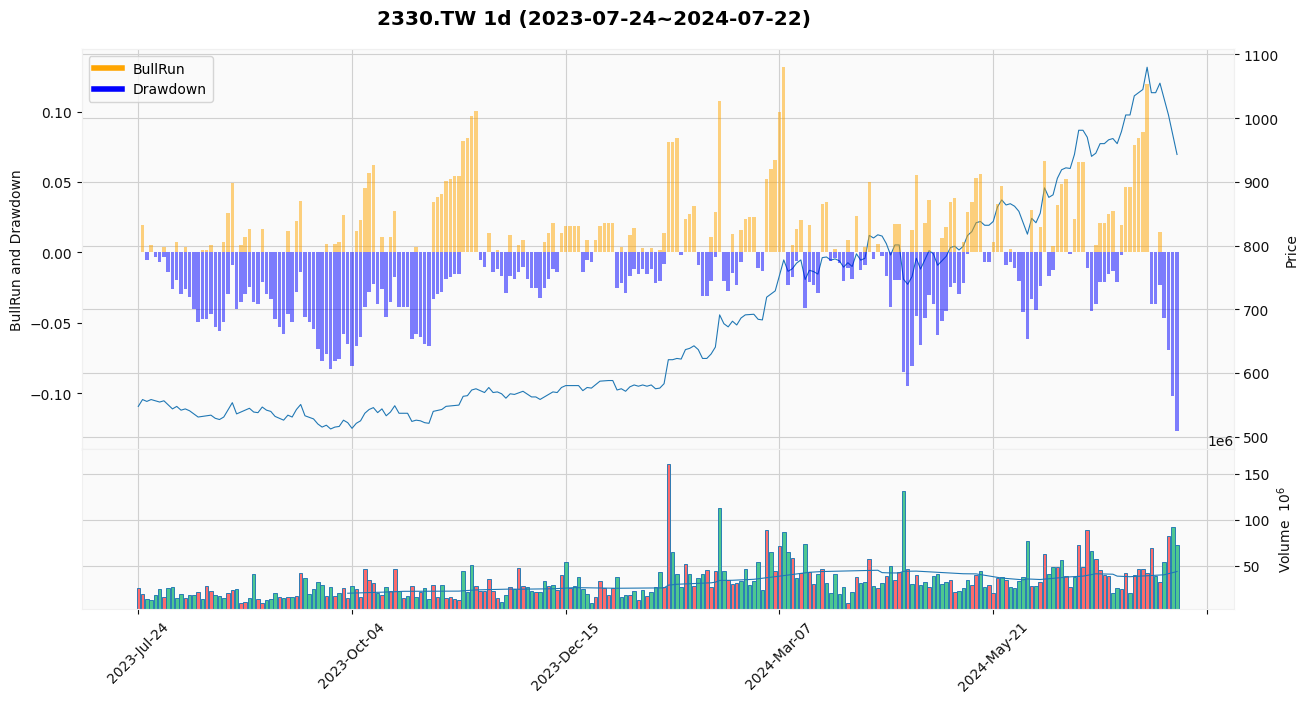

In [ ]:
kind = "BullRun and Drawdown" #@param ["Price, Volume, RSI", "Volume Profile", "Turnover Profile", "BullRun and Drawdown"]
symbol = "台積電" #@param ["TSLA", "NVDA", "MSFT", "AAPL", "GOOG", "MSTR", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "1y" #@param ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
interval = '1d' #@param ['1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']
legend_location = "best" #@param ["best", "upper right", "upper left", 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center']
total_bins = 28 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}

import vistock.mpl as vsm

tbl = {
    'Price, Volume, RSI': vsm.rsi,
    'Volume Profile': vsm.profile.Volume,
    'Turnover Profile': vsm.profile.Turnover,
    'BullRun and Drawdown': vsm.bull_draw,
}

module = tbl[kind]
if kind.endswith('Profile'):
    module.plot(symbol, period=period, interval=interval,
                legend_loc=legend_location, total_bins=total_bins)
else:
    module.plot(symbol, period=period, interval=interval,
                legend_loc=legend_location)


### Plot with Plotly

In [ ]:
kind = "BullRun and Drawdown" #@param ["Price and Volume Overlaid", "Price and Volume Separated", "Volume Profile with 2 Subplots", "Turnover Profile with 2 Subplots", "Volume Profile with 4 Subplots", "Turnover Profile with 4 Subplots", "BullRun and Drawdown"]
symbol = "NVDA" #@param ["TSLA", "NVDA", "MSFT", "AAPL", "GOOG", "MSTR", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "1y" #@param ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
interval = '1d' #@param ['1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']
total_bins = 42 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}
hides_nontrading = True #@param {type:"boolean"}
hbar_align_on_right = True #@param {type:"boolean"}

import vistock.plotly as vsp

tbl = {
    'Price and Volume Overlaid': vsp.pv1s,
    'Price and Volume Separated': vsp.pv2s,
    'Volume Profile with 2 Subplots': vsp.prf2s.Volume,
    'Turnover Profile with 2 Subplots': vsp.prf2s.Turnover,
    'Volume Profile with 4 Subplots': vsp.prf4s.Volume,
    'Turnover Profile with 4 Subplots': vsp.prf4s.Turnover,
    'BullRun and Drawdown': vsp.bull_draw,
}

module = tbl[kind]
if kind.endswith('4 Subplots'):
    module.plot(symbol, period=period, interval=interval, total_bins=total_bins,
                hides_nontrading=hides_nontrading)
elif kind.endswith('2 Subplots'):
    module.plot(symbol, period=period, interval=interval, total_bins=total_bins,
                hides_nontrading=hides_nontrading,
                hbar_align_on_right=hbar_align_on_right)
else:
    module.plot(symbol, period=period, interval=interval,
                hides_nontrading=hides_nontrading)

## Test

### Minimal Test Code for customized volume color

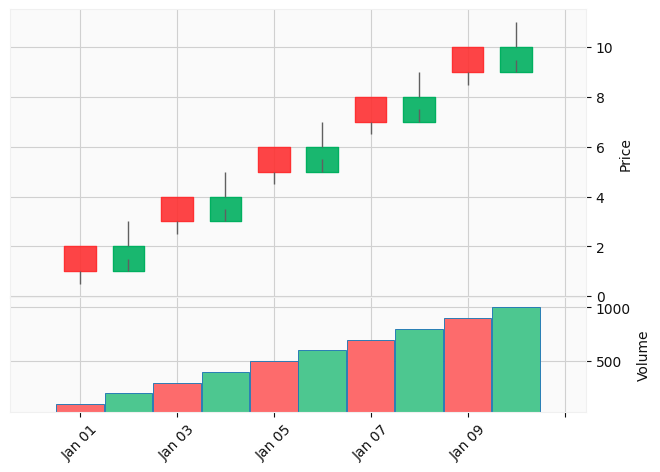

In [ ]:
import mplfinance as mpf
import pandas as pd

# Sample data
dates = pd.date_range('2023-01-01', periods=10)
data = {
    'Open': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'High': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Low': [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
    'Close': [2, 1, 4, 3, 6, 5, 8, 7, 10, 9],
    'Volume': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
df = pd.DataFrame(data, index=dates)

# Get the 'yahoo' style
yahoo_style = mpf.make_mpf_style(base_mpf_style='yahoo')

# Access the 'yahoo' style market colors
yahoo_market_colors = yahoo_style['marketcolors']

# Reverse the colors
reversed_market_colors = mpf.make_marketcolors(
    up=yahoo_market_colors['candle']['down'],
    down=yahoo_market_colors['candle']['up'],
    edge={'up': yahoo_market_colors['edge']['down'], 'down': yahoo_market_colors['edge']['up']},
    wick={'up': yahoo_market_colors['wick']['down'], 'down': yahoo_market_colors['wick']['up']},
    ohlc={'up': yahoo_market_colors['ohlc']['down'], 'down': yahoo_market_colors['ohlc']['up']},
    volume={'up': yahoo_market_colors['volume']['down'], 'down': yahoo_market_colors['volume']['up']}
)

# Define a new style with reversed colors
reversed_style = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=reversed_market_colors)

# Plot the candlestick chart
mpf.plot(df, type='candle', volume=True, style=reversed_style)


### Misc Tests

In [ ]:
from vistock import tw

tw.similar_stocks('印度')

[('富邦印度', '00652'), ('富邦印度正2', '00653L'), ('富邦印度反1', '00654R')]

In [ ]:
print(tw.as_yfinance('2330'))
print(tw.as_yfinance('元太'))
tw.as_yfinance('星宇航空')

2330.TW
8069.TWO


ChunkedEncodingError: ('Connection broken: IncompleteRead(3907258 bytes read, 801255 more expected)', IncompleteRead(3907258 bytes read, 801255 more expected))